# Fashion-MNIST Project

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV
import utils
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(utils)

%matplotlib inline


In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
# Combine train and test images and labels
images = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))
# Flatten images to 1D arrays
images = images.reshape(-1, 28*28)
# Convert images and labels to DataFrame
data = {'image_' + str(i): images[:, i] for i in range(images.shape[1])}
data['label'] = labels
df = pd.DataFrame(data)


In [9]:
df

,image_0,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,...,image_775,image_776,image_777,image_778,image_779,image_780,image_781,image_782,image_783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
69996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,1
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
# Shuffle the DataFrame according to your preference
df_shuffled = df.sample(frac=1).reset_index(drop=True)


In [11]:
X = df_shuffled.drop('label', axis=1)  
y = df_shuffled['label']
X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_, y_train_, test_size=0.1, random_state=42)

## The Labels according to their numbers in the array

Label: 0    ---> Class: T-shirt/top

Label: 1	---> Class: Trouser

Label: 2	---> Class: Pullover

Label: 3	---> Class: Dress

Label: 4	---> Class: Coat

Label: 5	---> Class: Sandal

Label: 6	---> Class: Shirt

Label: 7	---> Class: Sneaker

Label: 8	---> Class: Bag

Label: 9	---> Class: Ankle boot


In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


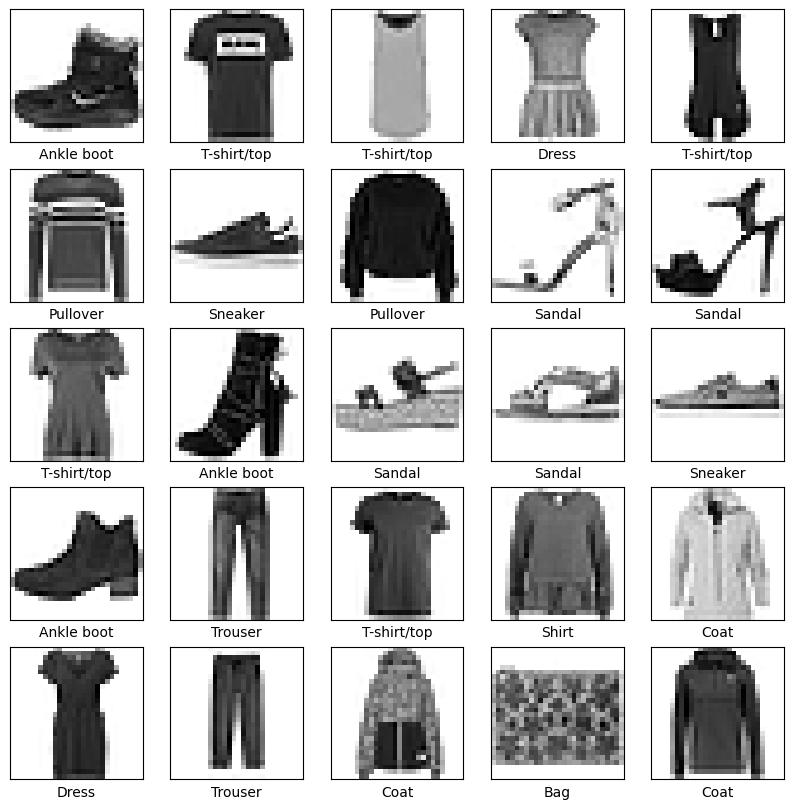

In [13]:
# Show the first 25 images

utils.plot_multi_images(train_images, train_labels, class_names)


Explore the Data

In [14]:
X_train.shape


(56700, 784)

In [15]:
len(y_train)


56700

In [16]:
X_test.shape


(7000, 784)

In [17]:
len(y_test)


7000

Preprocess the data

In [18]:
# To transform the images to be in scale from 0-1
train_images = X_train / 255.0

test_images = X_test / 255.0


Build the model

In [19]:
# print(train_images.shape)
# X_train = []
# X_test = []
# for i in range(len(train_images)):
#     temp = train_images[i].reshape(-1, 784)
#     X_train.append(temp[0])
# X_train = np.array(X_train)
# for i in range(len(test_images)):
#     temp = test_images[i].reshape(-1, 784)
#     X_test.append(temp[0])
# X_test = np.array(X_test)
# print(X_test.shape)

# y_train = train_labels.copy()
# y_test = test_labels.copy()


In [20]:
# X_train_ = X_train
# X_test_ = X_test
# y_train_ = y_train
# y_test_ = y_test

### Best K for Knn algorithm

In [21]:
best_k = 3

1


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
The best accuracy of the knn model is when k = 5 , and the score is: 0.8622857142857143


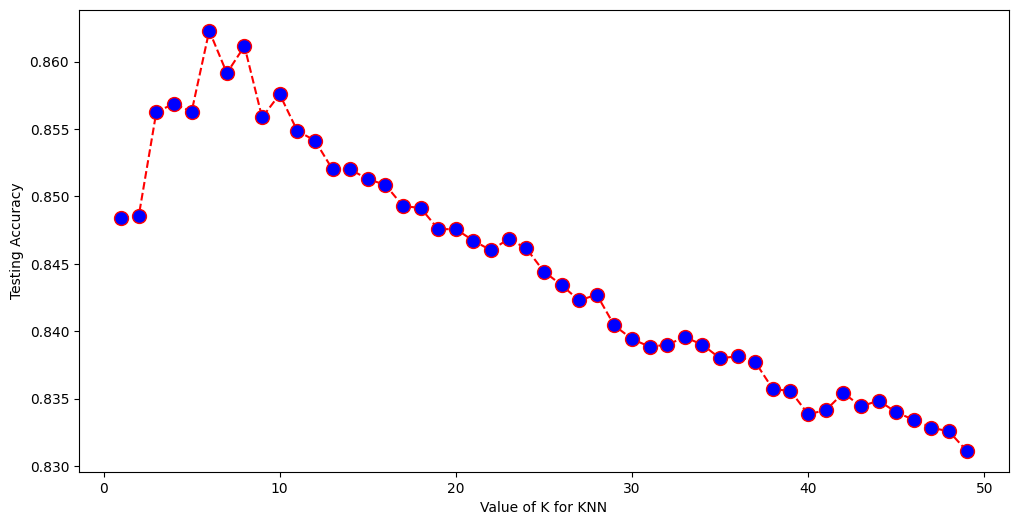

In [22]:
k_range = range(1,50)
scores = []
for k in k_range:
    print(k)
    knn_ = KNeighborsClassifier(n_neighbors=k)
    knn_.fit(X_train, y_train)
    y_pred = knn_.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(12, 6))
plt.plot(k_range, scores,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Finding the maximum k - the number of nearest neighbors:
max_score = max(scores)
best_k = scores.index(max_score)
print("The best accuracy of the knn model is when k =",best_k, ", and the score is:",max_score) 

In [23]:
best_k

5

## Training Our Models

In [24]:
knn = KNeighborsClassifier(n_neighbors=best_k)
log_reg = LogisticRegression(max_iter=100000, random_state=42)
randomForest = RandomForestClassifier()
clf = SGDClassifier(random_state=42)
sgd_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
gnb = GaussianNB()

### Fit the data

In [25]:
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn.score(X_test, y_test)

0.8562857142857143

In [26]:
# MSE
knn_mse = mean_squared_error(y_test, knn_predict)
print("MSE: ", knn_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, knn_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, knn_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, knn_predict))

MSE:  1.871
RMSE:  1.367845020461017
MAE:  4.363206553507572
R2 Score:  0.7738548958053187


In [27]:
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg.score(X_test, y_test)

c:\Users\moria\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8405714285714285

In [28]:
# MSE
log_reg_mse = mean_squared_error(y_test, log_reg_predict)
print("MSE: ", log_reg_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, log_reg_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, log_reg_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, log_reg_predict))

MSE:  2.043285714285714
RMSE:  1.4294354529973412
MAE:  4.5200663711941225
R2 Score:  0.7530309669927062


In [29]:
randomForest.fit(X_train, y_train)
randomForest_predict = randomForest.predict(X_test)

In [30]:
# MSE
random_forest_mse = mean_squared_error(y_test, randomForest_predict)
print("MSE: ", random_forest_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, randomForest_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, randomForest_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, randomForest_predict))

MSE:  1.6214285714285714
RMSE:  1.2733532783279633
MAE:  3.9573078872240552
R2 Score:  0.8040202387867732


In [31]:
sgd_clf.fit(X_train, y_train)
sgd_clf_predict = sgd_clf.predict(X_test)

In [32]:
# MSE
sgd_clf_mse = mean_squared_error(y_test, sgd_clf_predict)
print("MSE: ", sgd_clf_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, sgd_clf_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, sgd_clf_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, sgd_clf_predict))

MSE:  2.692285714285714
RMSE:  1.6408186110249097
MAE:  4.969564510957819
R2 Score:  0.6745872616894737


In [33]:
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb.score(X_test, y_test)

0.602

In [34]:
# MSE
gnb_mse = mean_squared_error(y_test, gnb_predict)
print("MSE: ", gnb_mse)

# RMSE
print("RMSE: ", np.sqrt(mean_squared_error(y_test, gnb_predict)))

# MAE
print("MAE: ", np.sqrt(mean_absolute_error(y_test, gnb_predict)))
      
# R2 Score
print("R2 Score: ", r2_score(y_test, gnb_predict))

MSE:  3.2214285714285715
RMSE:  1.7948338562186115
MAE:  7.160087788767477
R2 Score:  0.6106305184706373


### Adding the neural network

In [35]:
np.random.seed(42) #random seed is used to replicate the same result every time
tf.random.set_seed(42)


In [62]:
model = keras.models.Sequential() # USING SEQUENTIAL API
model.add(keras.layers.Flatten(input_shape=[28,28])) # input layer, converting 2D to 28*28 pixel using flatten
model.add(keras.layers.Dense(300,activation="relu")) # 1st hidden layer, 300=no. of neurons, relu=activation function
model.add(keras.layers.Dense(100,activation="relu")) # 2nd hidden layer
model.add(keras.layers.Dense(10,activation="softmax")) # output layer, categories=10
#relu = 0 for all negative numbers or relu = output for the positive numbers

In [74]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.summary() 
# param
# dense = 784*300+300 = 235500
# dense_1 = 300*100+100 = 30100
# dense_2 = 100*10+10 = 1010
# none  = no limit on input data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
# import pydot 
# import graphviz
from IPython.display import display

keras.utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [65]:
weights, biases = model.layers[1].get_weights()

In [66]:
weights

array([[-0.06769496, -0.0598982 , -0.05429435, ...,  0.07011454,
        -0.03216371, -0.01520686],
       [ 0.07162724, -0.02451283,  0.03368378, ..., -0.04902028,
        -0.00552334,  0.0579741 ],
       [ 0.05640934, -0.03654929, -0.05458285, ...,  0.05428344,
        -0.060597  ,  0.02395389],
       ...,
       [-0.04722395,  0.0325816 ,  0.04883258, ..., -0.05503178,
         0.00155792, -0.04655927],
       [ 0.07394874, -0.0387623 ,  0.01438469, ...,  0.06372315,
         0.02176867,  0.05161749],
       [ 0.0278377 , -0.02172751,  0.00488935, ...,  0.04362301,
        -0.06585388,  0.06416127]], dtype=float32)

In [67]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [68]:
biases.shape

(300,)

In [69]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
# scc = for categorical data
# sgd = stocashtic gradient descent
# for binary labels = binary_cross_entropy

In [88]:
X_train_shaped = X_train.values.reshape(-1, 28, 28)
X_validation_shaped = X_validation.values.reshape(-1, 28, 28)
X_test_shaped = X_test.values.reshape(-1, 28, 28)

In [80]:
def train_model(X_train, y_train, X_validation, y_validation):
    return model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

# # Call the function to train the model
# train_model(X_train_shaped, y_train, X_validation_shaped, y_validation)

In [81]:
model_history = train_model(X_train_shaped, y_train, X_validation_shaped, y_validation)
# by default epochs = 1

Epoch 1/30
1772/1772 [==============================] - 8s 4ms/step - loss: 0.4028 - accuracy: 0.8723 - val_loss: 0.5552 - val_accuracy: 0.8489
Epoch 2/30
1772/1772 [==============================] - 7s 4ms/step - loss: 0.3805 - accuracy: 0.8779 - val_loss: 0.5489 - val_accuracy: 0.8544
Epoch 3/30
1772/1772 [==============================] - 5s 3ms/step - loss: 0.3835 - accuracy: 0.8769 - val_loss: 0.5107 - val_accuracy: 0.8594
Epoch 4/30
1772/1772 [==============================] - 5s 3ms/step - loss: 0.3718 - accuracy: 0.8799 - val_loss: 0.5803 - val_accuracy: 0.8530
Epoch 5/30
1772/1772 [==============================] - 5s 3ms/step - loss: 0.3734 - accuracy: 0.8806 - val_loss: 0.5725 - val_accuracy: 0.8383
Epoch 6/30
1772/1772 [==============================] - 5s 3ms/step - loss: 0.3727 - accuracy: 0.8796 - val_loss: 0.5380 - val_accuracy: 0.8584
Epoch 7/30
1772/1772 [==============================] - 5s 3ms/step - loss: 0.3658 - accuracy: 0.8832 - val_loss: 0.5404 - val_accuracy:

In [82]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1772}

In [83]:
model_history.history

{'loss': [0.4028465449810028,
  0.3805255591869354,
  0.3835446238517761,
  0.3718331456184387,
  0.373447984457016,
  0.37266433238983154,
  0.36575785279273987,
  0.3555430471897125,
  0.35623010993003845,
  0.3525700569152832,
  0.3518809974193573,
  0.33606550097465515,
  0.3365451693534851,
  0.33621227741241455,
  0.3166847825050354,
  0.33499258756637573,
  0.32097873091697693,
  0.31962695717811584,
  0.3223775327205658,
  0.3138814866542816,
  0.31068310141563416,
  0.3098257780075073,
  0.29762375354766846,
  0.30712831020355225,
  0.30444905161857605,
  0.296726256608963,
  0.3048263192176819,
  0.2899012863636017,
  0.3055577278137207,
  0.2889544665813446],
 'accuracy': [0.8722751140594482,
  0.8778659701347351,
  0.8769311904907227,
  0.8798589110374451,
  0.8805820345878601,
  0.8796472549438477,
  0.8831745982170105,
  0.8850440979003906,
  0.8850264549255371,
  0.8848324418067932,
  0.885837733745575,
  0.8885537981987,
  0.8901587128639221,
  0.8884127140045166,
  0.8

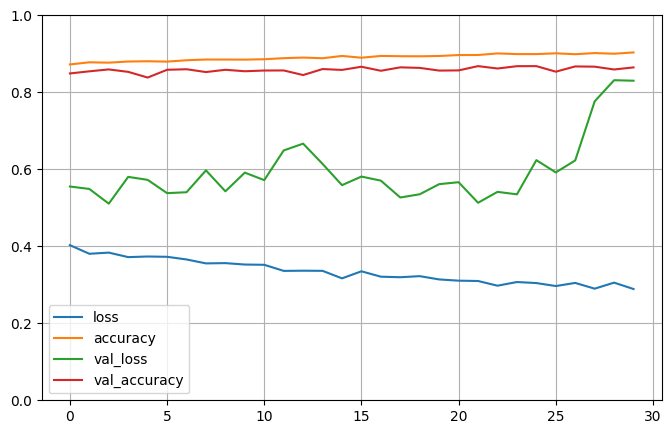

In [84]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### evaluating performance and predicting

In [85]:
model.evaluate(X_test,y_test)
# first = loss(0,3604) , second value = accuracy(0.8873)

219/219 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.8646


[0.6716984510421753, 0.8645714521408081]

In [89]:
x_new = X_test_shaped[:] # considering first three samples from test dataset

In [90]:
y_proba = model.predict(x_new) # probability to each class
y_proba.round(2) 

219/219 [==============================] - 0s 1ms/step


array([[0.84, 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.92, ..., 0.  , 0.01, 0.  ]], dtype=float32)

In [91]:
y_pred = model.predict_classes(x_new)
y_pred
# as category starts from 0 to 9
# for first record category = 9 which can be confirmed by above probabilities
# category of second sample = 2
# category of third sample = 1

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
pred_names = np.array(class_names)[y_pred]
pred_names

In [ ]:
print(plt.imshow(X_test[20]))
print(plt.imshow(X_test[20]),pred_names[20])

In [ ]:
print(plt.imshow(X_test[2000]))


In [ ]:
print(plt.imshow(X_test[525]))
